<a href="https://colab.research.google.com/github/makena-yvonne/Countdown/blob/master/Pandas_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hands on!


In [1]:
import pandas as pd
import numpy as np

Pandas Series
We'll start analyzing "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a pandas.Series object.

In [2]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [3]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64


Someone might not know we're representing population in millions of inhabitants. Series can have a name, to better document the purpose of the Series:


In [4]:
g7_pop.name = 'G7 Population in millions'

In [5]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64


Series are pretty similar to numpy arrays:

In [6]:
g7_pop.dtype

dtype('float64')

In [7]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

They're actually backed by numpy arrays:

In [8]:
type(g7_pop.values)

numpy.ndarray

And they look like simple Python lists or Numpy Arrays. But they're actually more similar to Python dicts.

A Series has an index, that's similar to the automatic index assigned to Python's lists:

In [9]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [10]:
g7_pop[0]

35.467

In [11]:
g7_pop[1]

63.951

In [12]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [13]:
l = ['a', 'b', 'c']

But, in contrast to lists, we can explicitly define the index:

In [14]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [15]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Compare it with the [following table](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing):


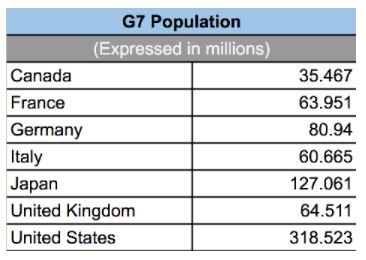



We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries:

In [16]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [17]:
pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

You can also create Series out of other series, specifying indexes:

In [18]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: G7 Population in millions, dtype: float64

EXERCISE

In [19]:
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned)

Tom      8
Kris     2
Ahmad    5
Beau     6
dtype: int64


**Indexing**

Indexing works similarly to lists and dictionaries, you use the index of the element you're looking for:

In [20]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [21]:
g7_pop['Canada']

35.467

In [22]:
g7_pop['Japan']

127.061


Numeric positions can also be used, with the iloc attribute:

In [23]:
g7_pop.iloc[0]

35.467

In [24]:
g7_pop.iloc[-1]

318.523

Selecting multiple elements at once:

In [36]:
g7_pop[['Italy', 'France']]

Italy     60.665
France    63.951
Name: G7 Population in millions, dtype: float64

(The result is another Series)

In [26]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: G7 Population in millions, dtype: float64

Slicing also works, but important, in Pandas, the upper limit is also included:

In [27]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

**Conditional selection (boolean arrays)**

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas Series:

In [28]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [29]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [38]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [31]:
g7_pop.mean()

107.30257142857144

In [32]:
g7_pop[g7_pop > g7_pop.mean()]

Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [33]:
g7_pop.std()

97.24996987121581

In [ ]:
~ not
| or
& and

In [41]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

**Operations and methods**

Series also support vectorized operations and aggregation functions as Numpy:

In [42]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [43]:
g7_pop * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [44]:
g7_pop.mean()

107.30257142857144

In [45]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in millions, dtype: float64

In [46]:
g7_pop['France': 'Italy'].mean()

68.51866666666666

**Boolean arrays**

(Work in the same way as numpy)

In [47]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [48]:
g7_pop > 80

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [49]:
g7_pop[g7_pop > 80]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [50]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [51]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: G7 Population in millions, dtype: float64

**Modifying series**

In [53]:
g7_pop['Canada'] = 40.5

In [54]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [55]:
g7_pop.iloc[-1] = 500

In [56]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [57]:
g7_pop[g7_pop < 70]

Canada            40.500
France            63.951
Italy             60.665
United Kingdom    64.511
Name: G7 Population in millions, dtype: float64

In [58]:
g7_pop[g7_pop < 70] = 99.99

In [59]:
g7_pop

Canada             99.990
France             99.990
Germany            80.940
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: G7 Population in millions, dtype: float64

EXERCISE

In [60]:
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned[certificates_earned > 5])

Tom     8
Beau    6
dtype: int64
